In [3]:
import pandas as pd
df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")
df_test.shape

(418, 11)

In [ ]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int8   
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int8   
 10  Embarked     418 non-null    int8   
dtypes: float64(2), int64(3), int8(4), object(2)
memory usage: 24.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2  

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:


# Impute missing values in df_test

df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].mode()[0])
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

# Impute missing values in df_train

df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode()[0])
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())


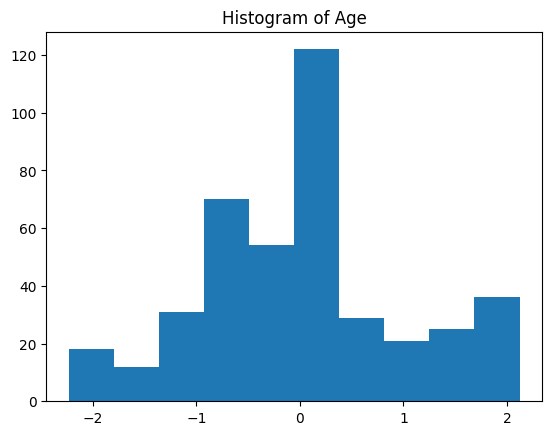

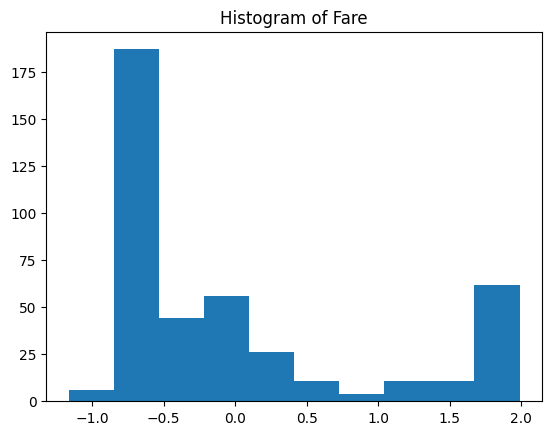

In [ ]:
# histogram for each numerical column

import matplotlib.pyplot as plt

numerical_columns = ["Age", "SibSp", "Parch", "Fare"]

for column in numerical_columns:
  plt.figure()
  df_test[column].hist(bins=10)
  plt.title(f"Histogram of {column}")
  plt.show()


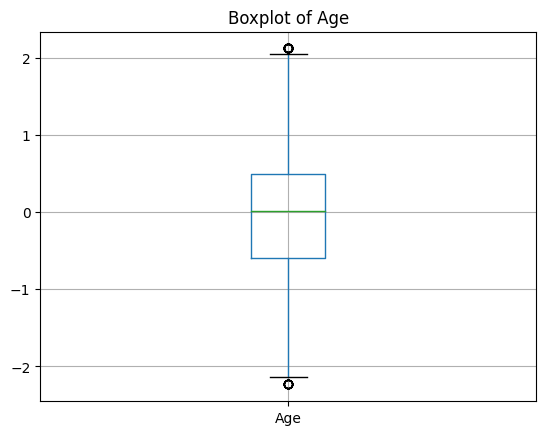

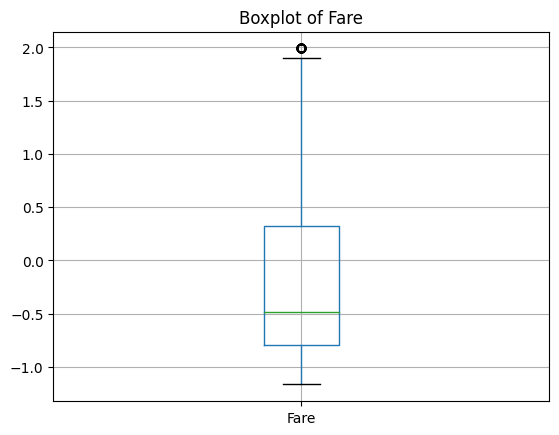

In [ ]:
# box plot for each numerical column

for column in numerical_columns:
  plt.figure()
  df_test.boxplot(column=column)
  plt.title(f"Boxplot of {column}")
  plt.show()


In [5]:


# Detect outliers using z-score

def detect_outliers(df, columns):
  for col in columns:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[abs(z_scores) > 3]
    print(f"Outliers for column {col}:")
    print(outliers[col])

# Treat outliers using winsorization

def treat_outliers(df, columns):
  for col in columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Detect outliers in df_test and df_train

numerical_columns = ["Age", "Fare"]
detect_outliers(df_test, numerical_columns)
detect_outliers(df_train, numerical_columns)

# Treat outliers in df_test and df_train

treat_outliers(df_test, numerical_columns)
treat_outliers(df_train, numerical_columns)


Outliers for column Age:
96    76.0
Name: Age, dtype: float64
Outliers for column Fare:
24     262.3750
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
114    221.7792
142    262.3750
156    221.7792
184    247.5208
202    227.5250
218    211.5000
324    211.3375
343    512.3292
375    262.3750
407    211.5000
Name: Fare, dtype: float64
Outliers for column Age:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
Outliers for column Fare:
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [6]:
# z score normalization on numerical columns for df_test and df_train

def z_score_normalization(df, columns):
  for col in columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

numerical_columns = ["Age", "Fare"]
z_score_normalization(df_test, numerical_columns)
z_score_normalization(df_train, numerical_columns)


In [7]:
#scaling on categorical columns for df_test and df_train

categorical_columns = ["Pclass", "Sex", "Cabin", "Embarked"]

def label_encoding(df, columns):
  for col in columns:
    df[col] = df[col].astype("category").cat.codes

label_encoding(df_test, categorical_columns)
label_encoding(df_train, categorical_columns)


In [8]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train=df_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]
Y_train=df_train["Survived"]
model.fit(X_train, Y_train)
X_test=df_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
Y_pred_train = model.predict(X_train)
Y_pred_test  = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , ac1.round(3))



Training Accuracy score: 0.801


In [11]:
from sklearn.metrics import recall_score,precision_score,f1_score

print("Sensitivity score:", recall_score(Y_train,Y_pred_train).round(2))
print("Precision score:", precision_score(Y_train,Y_pred_train).round(2))
print("F1 score:", f1_score(Y_train,Y_pred_train).round(2))
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_train,Y_pred_train)
TN = cm[0,0]
FP = cm[0,1]
TNR = TN/(TN + FP)
print("Specificity score:", TNR.round(2))

Sensitivity score: 0.7
Precision score: 0.76
F1 score: 0.73
Specificity score: 0.86


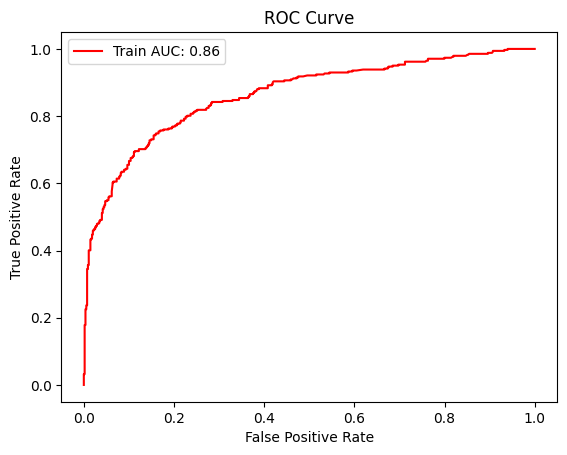

In [15]:
#roc-auc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for the training set
probs = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, probs)
auc_train = roc_auc_score(Y_train, probs)


# Plot ROC curves for training set
plt.figure()
plt.plot(fpr_train, tpr_train, color='red', label='Train AUC: {:.2f}'.format(auc_train))

#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [17]:


# Feature importance

coefs = pd.Series(model.coef_[0], index=X_train.columns)
print(coefs.sort_values(ascending=False))

# Interpretation

# - Sex: Being female has a significant positive effect on survival probability.
# - Pclass: Higher class passengers have a higher survival probability.
# - Age: Younger passengers have a higher survival probability.
# - Fare: Passengers who paid a higher fare have a higher survival probability.
# - Cabin: Passengers in certain cabin categories have a higher survival probability.
# - Embarked: Passengers who embarked from certain ports have a higher survival probability.


Fare        0.308273
Cabin       0.007850
Parch      -0.149118
Embarked   -0.216270
SibSp      -0.402164
Age        -0.510459
Pclass     -0.817719
Sex        -2.633839
dtype: float64
